In [1]:
%matplotlib inline
import torch
import random
import matplotlib.pyplot as plt

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b;
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.1005, 0.2175]) 
label: tensor([3.6806])


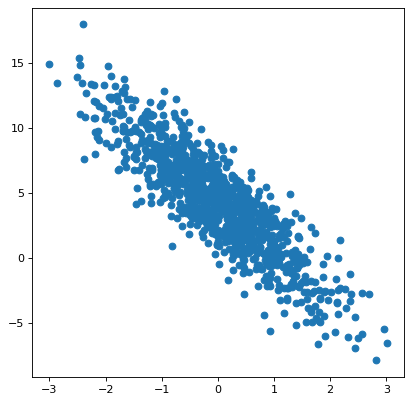

In [4]:
plt.figure(figsize=(6,6), dpi=80)
plt.scatter(features[:, 1].numpy(), labels.numpy())
plt.show()

In [11]:
def data_iter(batch_size, X, y):
    num_examples = len(X)
    indices = list(range(num_examples))
    # 打乱顺序
    random.shuffle(indices)
    for i in range(0,num_examples, batch_size):
        batch_indices =  indices[i:min(i+batch_size, num_examples)]
        yield X[batch_indices], y[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    print(X.shape, y.shape)
    break;

tensor([[-0.8828,  0.1961],
        [-1.4119, -0.6937],
        [-1.2623, -0.0198],
        [-0.7296,  0.5456],
        [ 1.3853, -1.6703],
        [ 0.2527,  0.5708],
        [-0.7537, -2.4508],
        [ 0.9677,  0.4197],
        [ 0.0391,  0.1723],
        [ 0.1623,  0.0356]]) 
 tensor([[ 1.7675],
        [ 3.7230],
        [ 1.7493],
        [ 0.8918],
        [12.6451],
        [ 2.7717],
        [11.0293],
        [ 4.7091],
        [ 3.6862],
        [ 4.4075]])
torch.Size([10, 2]) torch.Size([10, 1])


In [6]:
w = torch.normal(0, 0.01, (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
def linearReg(X, w, b):
    return torch.matmul(X, w) + b

In [8]:
def lossLinear(y, y_hat):
    return ((y-y_hat.reshape(y.shape))**2 / 2).sum()

In [9]:
def mb_sgd(params, lambda_, batch_size):
    with torch.no_grad():
        for param in params:
            param -= (lambda_ / batch_size) * param.grad
            param.grad.zero_()

In [10]:
num_epochs = 3
lambda_ = 0.03
net = linearReg
loss = lossLinear

for epoch in range(num_epochs):
    for X, y  in data_iter(batch_size, features, labels):
        l = loss(y, net(X, w, b))
        l.backward()
        mb_sgd([w,b],lambda_,batch_size)
    with torch.no_grad():
        train_l = loss(labels, net(features,w,b))
        print(f' epoch {epoch+1}, loss {train_l.mean():f}')

 epoch 1, loss 31.297464
 epoch 2, loss 0.107831
 epoch 3, loss 0.053913
